# Implementing Logistic Regression from Scratch

In this notebook, we will go through the step-by-step implementation of logistic regression from scratch using Python. Logistic regression is a widely used classification algorithm that models the probability of a binary outcome. We'll build a solid understanding of how logistic regression works and create a functional model without relying on external libraries.

## Table of Contents

1. [Introduction to Logistic Regression](#introduction)
2. [Data Preparation](#data-preparation)
3. [Model Implementation](#model-implementation)
4. [Training the Model](#training-the-model)
5. [Making Class Predictions](#making-class-predictions)
6. [Evaluation](#evaluation)

## Introduction to Logistic Regression <a name="introduction"></a>

Logistic regression is used for binary classification problems where the dependent variable (target) is categorical, representing one of two classes. The logistic regression model calculates the probability of an instance belonging to a particular class using the logistic function. The equation for logistic regression is given by:


$$
P(Y=1|X) = \frac{1}{1 + e^{-(mx + b)}}
$$

Where:
- \(P(Y=1|X)\) is the probability of the target being class 1 given input \(X\)
- \(x\) is the input feature
- \(m\) is the slope parameter
- \(b\) is the intercept

Our goal is to determine the optimal values of \(m\) and \(b\) that maximize the likelihood of the observed data.


In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn.metrics import confusion_matrix

## Data Preparation <a name="data-preparation"></a>

Before building our logistic regression model, we need to prepare the dataset. We'll perform feature scaling, data splitting, and other preprocessing steps as necessary.

## Model Implementation <a name="model-implementation"></a>

Let's implement the logistic regression model step by step:

### 1. Initialize Parameters

We start by initializing the parameters \(m\) and \(b\) with random values or zeros.

### 2. Calculate Predictions

We calculate the predicted probabilities using the logistic function.

### 3. Compute Loss

The loss (error) is computed using the log loss (cross-entropy) function, which measures the difference between predicted probabilities and actual class labels.

### 4. Update Parameters

We update the parameters \(m\) and \(b\) using gradient descent to minimize the loss.

### 5. Repeat

Steps 2 to 4 are repeated iteratively for a specified number of epochs or until convergence.

In [2]:
class LogisticRegression:
    """
    An implementation of the Logistic Regression algorithm 
    using gradient descent via the NumPy library
    """
    def __init__(self, learning_rate=1e-3, n_iterations=1000, threshold=0.5):
        self.lr = learning_rate 
        self.n_iterations = n_iterations
        self.threshold = threshold
        self.weights = None 
        self.bias = None 
    def fit(self, X, y):
        """
        Function used to train the LogisticRegression classifier
        """
        n_samples, n_features = X.shape 

        # Initialize weights and bias parameters 
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Apply Gradient Descent 
        for _ in range(self.n_iterations):
            y_predicted = self._sigmoid(np.dot(X, self.weights) + self.bias)

            # Calculate Gradients 
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias parameters 
            self.weights -= self.lr * dw 
            self.bias -= self.lr * db

    def predict(self, X):
        """
        Function to predict a new value from the trained
        classifier
        """        
        y_predicted = self._sigmoid(np.dot(X, self.weights) + self.bias)
        y_predicted_cls = [1 if i > self.threshold else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def predict_proba(self, X):
        """
        Function to get prediction probability for a new value from the trained
        classifier
        """        
        y_predicted = self._sigmoid(np.dot(X, self.weights) + self.bias)
        return np.array(y_predicted)

    def _sigmoid(self, x):
        """
        Helper function to get the sigmoid output
        from a given x
        """
        return 1 / (1 + np.exp(-x))

## Training the Model <a name="training-the-model"></a>

Now, we will train our linear regression model using the prepared dataset. We'll apply gradient descent to update the parameters and minimize the loss.

In [3]:
# Generate a Regression Dataset
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

# Perform a split of training and testing data with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 4
)

In [4]:
# Train a LinearRegression Classifier
clf = LogisticRegression(learning_rate=1e-3, n_iterations=10000)
clf.fit(X_train, y_train)

C:\Users\josep\AppData\Local\Temp\ipykernel_12508\255701005.py:56: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## Making Predictions <a name="making-predictions"></a>

After training the model, we can make predictions on new, unseen data points using the learned parameters \(m\) and \(b\).

In [5]:
# Generate Predictions from the Fitted Model
predictions = clf.predict(X_test)

C:\Users\josep\AppData\Local\Temp\ipykernel_12508\255701005.py:56: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## Evaluation <a name="evaluation"></a>

To evaluate our model's performance, we can calculate metrics such as accuracy, precision, recall, and F1-score. These metrics help us assess how well the model classifies instances into the correct classes.

In [6]:
def calculate_metrics(y_true, y_pred):
    """
    Helper function to determine precision,
    recall, accuracy, and a confusion matrix
    from the trained model's predictions vs. actuals
    """
    TP = np.sum(np.logical_and(y_pred == 1, y_true == 1))
    TN = np.sum(np.logical_and(y_pred == 0, y_true == 0))
    FP = np.sum(np.logical_and(y_pred == 1, y_true == 0))
    FN = np.sum(np.logical_and(y_pred == 0, y_true == 1))
    conf_mat = np.array([TN, FP, FN, TP], dtype=np.int64).reshape(2, 2)
    precision = TP / float(TP + FP)
    recall = TP / float(TP + FN)
    f1 = (precision * recall) / (precision + recall)
    accuracy = float(TP + TN) / float(TP + TN + FP + FN)
    return precision, recall, f1, accuracy, conf_mat

In [7]:
precision, recall, f1, accuracy, conf_mat = calculate_metrics(y_test, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_mat}')

Precision: 0.92
Recall: 0.96
F1 Score: 0.47
Accuracy: 0.91
Confusion Matrix:
[[27  7]
 [ 3 77]]


Text(0.5, 427.9555555555555, 'Predicted Diagnosis')

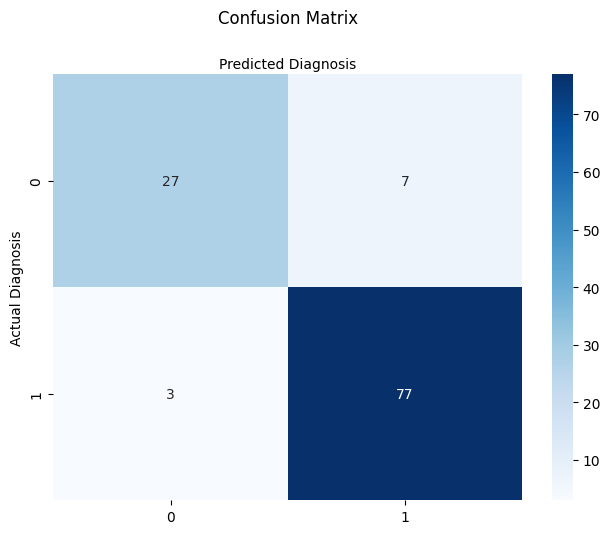

In [8]:
# Generate a Confusion Matrix to Showcase Results
class_names = ['No Cancer', 'Cancer']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis')

## Conclusion

In this notebook, we've successfully implemented logistic regression from scratch, a powerful algorithm for binary classification problems. We covered the essential steps of data preparation, model implementation, training, prediction, and evaluation. This exercise provides a strong foundation for understanding the mechanics of logistic regression and serves as a starting point for more advanced classification techniques in machine learning.